<a href="https://colab.research.google.com/github/BundeAmos/Time_Series/blob/main/Forecasting_Energy_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>












Markdown

Python 3
Forecasting Energy Demand
#  Forecasting Energy Demand
Importing Necessary Libraries and Functions
The first thing we need to do is import the necessary functions and libraries that we will be working with throughout the topic. We should also go ahead and upload all the of the necessary data sets here instead of loading them as we go. We will be using energy production data from PJM Interconnection. They are a regional transmission organization that coordinates the movement of wholesale electricity in parts of the United States. Specifically, we will be focused on a region of Pennsylvania. We will also be using temperature data collected from the National Oceanic and Atmospheric Assocation (NOAA).

The first thing we need to do is import the necessary functions and libraries that we will be working with throughout the topic. We should also go ahead and upload all the of the necessary data sets here instead of loading them as we go. We will be using energy production data from PJM Interconnection. They are a regional transmission organization that coordinates the movement of wholesale electricity in parts of the United States. Specifically, we will be focused on a region of Pennsylvania. We will also be using temperature data collected from the National Oceanic and Atmospheric Assocation (NOAA).

## Objective

* Linear regression models are great initial models to build that predict a continuous variable (like energy usage). The typical linear regression modeling framework uses what we call ordinary least squares (OLS) to develop the model. For more information on OLS regression feel free to click on the help section below or look further in the resources!

* Build a linear regression model using the information you have learned from the previous sections with relationship to energy across time as well as energy’s relationship with temperature. Time to start building on what you have looked at in previous sections!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparing the Energy and Temperature Data

In [4]:
# Loading the Needed Data Sets 
weather = pd.read_csv('/content/drive/MyDrive/Time Series/hr_temp_1_subset.csv')
energy = pd.read_csv('/content/drive/MyDrive/Time Series/hrl_load_metered.csv')



In [5]:
weather.head()

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature
0,72520514762,2017-02-01T00:53:00,FM-15,7,37.0
1,72520514762,2017-02-01T01:53:00,FM-15,7,37.0
2,72520514762,2017-02-01T02:53:00,FM-15,7,36.0
3,72520514762,2017-02-01T03:53:00,FM-15,7,36.0
4,72520514762,2017-02-01T04:53:00,FM-15,7,36.0


In [6]:
energy.head()

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,2/1/2017 5:00,2/1/2017 0:00,RFC,WEST,DUQ,DUQ,1419.881,True
1,2/1/2017 6:00,2/1/2017 1:00,RFC,WEST,DUQ,DUQ,1379.505,True
2,2/1/2017 7:00,2/1/2017 2:00,RFC,WEST,DUQ,DUQ,1366.106,True
3,2/1/2017 8:00,2/1/2017 3:00,RFC,WEST,DUQ,DUQ,1364.453,True
4,2/1/2017 9:00,2/1/2017 4:00,RFC,WEST,DUQ,DUQ,1391.265,True


In [7]:
data = {'MW': energy['mw'], 'Temp': weather['HourlyDryBulbTemperature'], 'Date': weather['DATE']}

In [8]:
df = pd.DataFrame(data)

In [9]:
print(df.dtypes)

MW      float64
Temp    float64
Date     object
dtype: object


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

MW             float64
Temp           float64
Date    datetime64[ns]
dtype: object


In [11]:
df['hour'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).hour
df['day'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).day
df['weekday'] = df['Date'].dt.dayofweek
df['month'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).month
df['year'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).year

df.head()

,MW,Temp,Date,hour,day,weekday,month,year
0,1419.881,37.0,2017-02-01 00:53:00,0,1,2,2,2017
1,1379.505,37.0,2017-02-01 01:53:00,1,1,2,2,2017
2,1366.106,36.0,2017-02-01 02:53:00,2,1,2,2,2017
3,1364.453,36.0,2017-02-01 03:53:00,3,1,2,2,2017
4,1391.265,36.0,2017-02-01 04:53:00,4,1,2,2,2017


In [12]:
df =df.set_index('Date')

In [13]:
sum(df['Temp'].isnull())

37

In [14]:
df['Temp'] = df['Temp'].interpolate(method='linear')

In [15]:
sum(df['Temp'].isnull())

0

In [16]:
sum(df['MW'].isnull())

0

In [17]:
#Training and Validation Split #
train = pd.DataFrame(df['2017-01-01':'2019-12-31'])
test = pd.DataFrame(df['2020-01-01':'2020-01-31'])

In [18]:
train.head()

,MW,Temp,hour,day,weekday,month,year
Date,,,,,,,
2017-02-01 00:53:00,1419.881,37.0,0,1,2,2,2017
2017-02-01 01:53:00,1379.505,37.0,1,1,2,2,2017
2017-02-01 02:53:00,1366.106,36.0,2,1,2,2,2017
2017-02-01 03:53:00,1364.453,36.0,3,1,2,2,2017
2017-02-01 04:53:00,1391.265,36.0,4,1,2,2,2017


In [19]:
test.head()

,MW,Temp,hour,day,weekday,month,year
Date,,,,,,,
2020-01-01 00:53:00,1363.428,31.0,0,1,2,1,2020
2020-01-01 01:53:00,1335.975,29.0,1,1,2,1,2020
2020-01-01 02:53:00,1296.817,30.0,2,1,2,1,2020
2020-01-01 03:53:00,1288.403,30.0,3,1,2,1,2020
2020-01-01 04:53:00,1292.263,31.0,4,1,2,1,2020


 # Exploring / Visualizing Energy and Temperature Data 

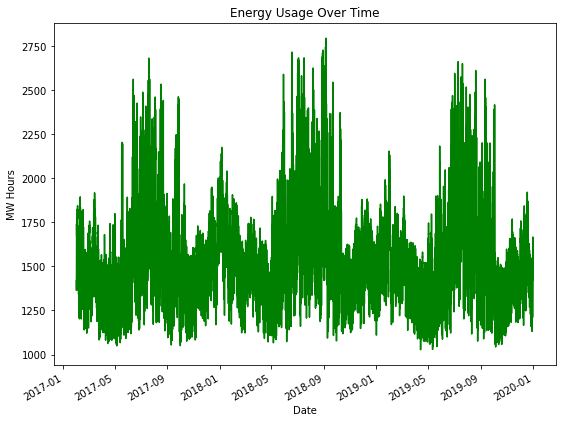

In [20]:
ax1 = train['MW'].plot(color = 'green', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')
ax1.set_title('Energy Usage Over Time')

plt.show()

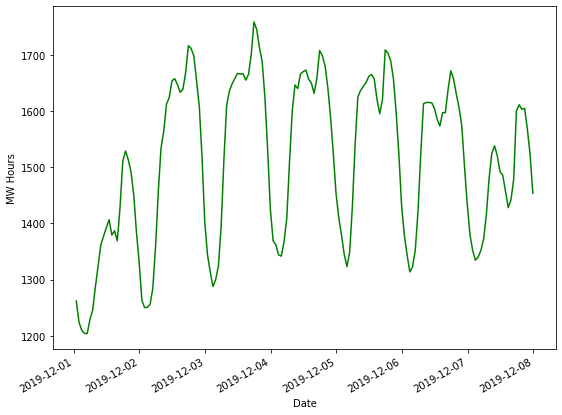

In [21]:
train_mw = train['MW']

ax1 = train_mw['2019-12-01':'2019-12-07'].plot(color = 'green', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')

plt.show()

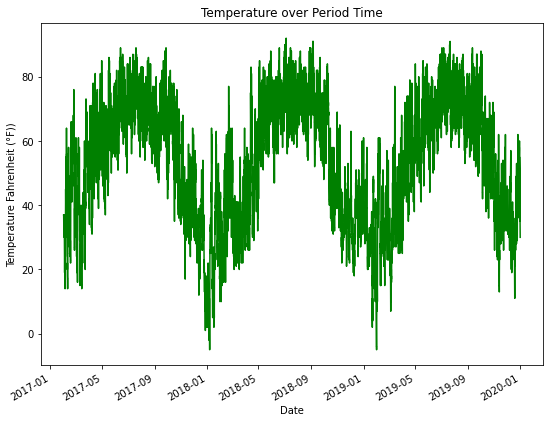

In [22]:
ax2 = train['Temp'].plot(color = 'green', figsize=(9,7))

ax2.set_ylabel('Temperature Fahrenheit (°F))')
ax2.set_xlabel('Date')
ax2.set_title('Temperature over Period Time')

plt.show()

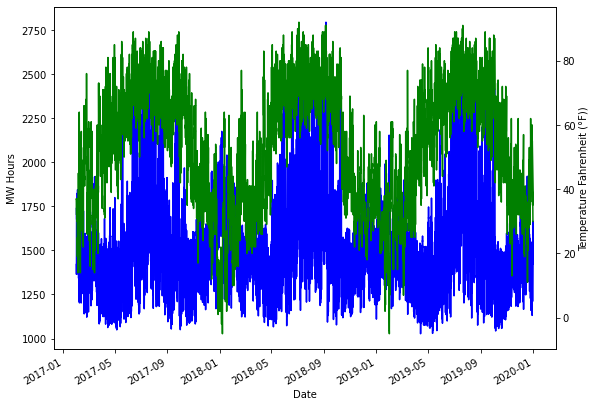

In [23]:
ax1 = train['MW'].plot(color = 'blue', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2 = train['Temp'].plot(color = 'green', figsize=(9,7))

ax2.set_ylabel('Temperature Fahrenheit (°F))')

plt.show()

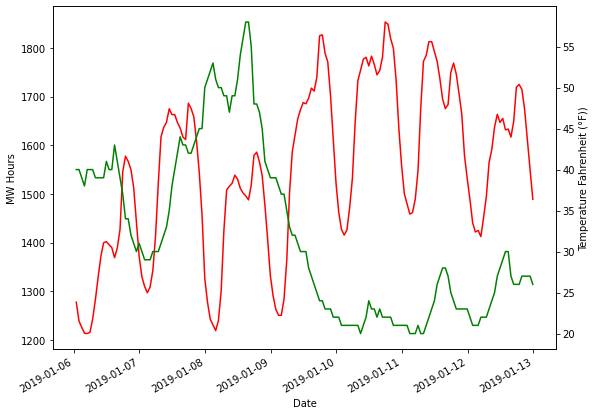

In [24]:
train_mw = train['MW']
train_t = train['Temp']

ax1 = train_mw['2019-01-06':'2019-01-12'].plot(color = 'red', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2 = train_t['2019-01-06':'2019-01-12'].plot(color = 'green', figsize=(9,7))

ax2.set_ylabel('Temperature Fahrenheit (°F))')

plt.show()

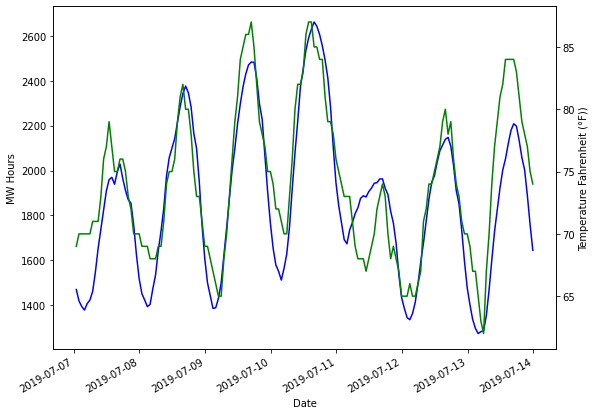

In [25]:
train_mw = train['MW']
train_t = train['Temp']

ax1 = train_mw['2019-07-07':'2019-07-13'].plot(color = 'blue', figsize=(9,7))

ax1.set_ylabel('MW Hours')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2 = train_t['2019-07-07':'2019-07-13'].plot(color = 'green', figsize=(9,7))

ax2.set_ylabel('Temperature Fahrenheit (°F))')

plt.show()

In [26]:
correlation = train['Temp'].corr(train['MW'])
print("Correlation is: ", correlation)

Correlation is:  0.32753955690741204


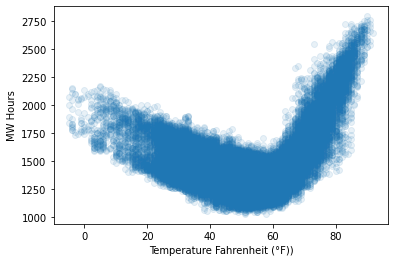

In [27]:
plt.scatter(train['Temp'], train['MW'], alpha = 0.1)
plt.xlabel('Temperature Fahrenheit (°F))')
plt.ylabel('MW Hours')
plt.show()

# Building Naive Energy Model


Now that we have recreated the pieces of milestone 1 that clean and split our data we can start the modeling phase of milestone 3.

First, let's review some of the findings we have from the first two milestones:
- Energy usage changes depending on month / season
- Energy usage changes depending on day of week
- Energy usage changes depending on hour of day
- Energy usage changes depending on outside temperature
- The relationship between temperature and energy usage appears quadratic in nature

Looking at this last bullet point, we need to create a quadratic variable on temperature as temperature in the model by itself won't be enough to model energy usage. It is always good practice to standardize (mean of 0 and standard deviation of 1) any variable you are going to raise to a higher power in a regression to help prevent multicollinearity problems. We can standardize the variable *Temp* by using the ```mean``` and ```std``` functions.

In [28]:
train['Temp_Norm'] = (train['Temp'] - train['Temp'].mean())/train['Temp'].std()

Now we have standardize the temprature, we need to get the quadratic value by itself.

In [29]:
train['Temp_Norm_2'] = train['Temp_Norm']**2

In [30]:
train.head()

,MW,Temp,hour,day,weekday,month,year,Temp_Norm,Temp_Norm_2
Date,,,,,,,,,
2017-02-01 00:53:00,1419.881,37.0,0,1,2,2,2017,-0.871499,0.759511
2017-02-01 01:53:00,1379.505,37.0,1,1,2,2,2017,-0.871499,0.759511
2017-02-01 02:53:00,1366.106,36.0,2,1,2,2,2017,-0.924494,0.854690
2017-02-01 03:53:00,1364.453,36.0,3,1,2,2,2017,-0.924494,0.854690
2017-02-01 04:53:00,1391.265,36.0,4,1,2,2,2017,-0.924494,0.854690


We have a foundation of building  a Naive OLS Model

In [31]:
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [32]:
output = sm.OLS.from_formula('MW ~ Temp_Norm + Temp_Norm_2 + C(weekday) + C(hour) + C(month)', data = train).fit()
print(output.summary())

                            OLS Regression Results                            
Dep. Variable:                     MW   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     3180.
Date:                Sun, 05 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:55:56   Log-Likelihood:            -1.5735e+05
No. Observations:               25536   AIC:                         3.148e+05
Df Residuals:                   25493   BIC:                         3.151e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1272.0274      5.426    2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


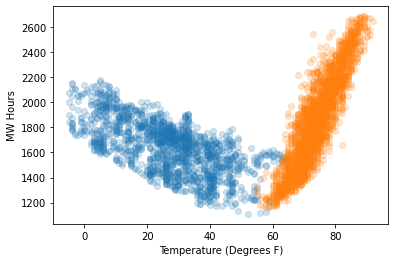

In [33]:
plt.subplot()
plt.scatter(train['Temp'].where(train['month'] == 1), train['MW'].where(train['month'] == 1), alpha = 0.2)
plt.xlabel('Temperature (Degrees F)')
plt.ylabel('MW Hours')

plt.subplot()
plt.scatter(train['Temp'].where(train['month'] == 7), train['MW'].where(train['month'] == 7), alpha = 0.2)
plt.xlabel('Temperature (Degrees F)')
plt.ylabel('MW Hours')

plt.show()

From above it looks like all the variables appear to statistically be related to energy. Our model is off to a great start! Let's try to add additional terms to our model to improve it.

We already checked if month and temperature have separate impacts on energy usage. However, from the plots we saw earlier we also hypothesized that the effect of temperature was different in different months. Let's try to visualize that here. The following code highlights the months of January and July in our previous temperature by energy usage scatter plot.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


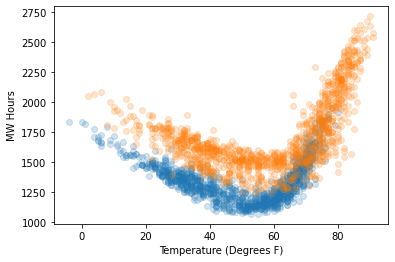

In [34]:
plt.subplot()
plt.scatter(train['Temp'].where(train['hour'] == 0), train['MW'].where(train['hour'] == 0), alpha = 0.2)
plt.xlabel('Temperature (Degrees F)')
plt.ylabel('MW Hours')

plt.subplot()
plt.scatter(train['Temp'].where(train['hour'] == 12), train['MW'].where(train['hour'] == 12), alpha = 0.2)
plt.xlabel('Temperature (Degrees F)')
plt.ylabel('MW Hours')

plt.show()

Again, it looks like some differences are occurring. Not surprisingly, people react more to temperature changes when they are awake as compared to when they are asleep. Let's incorporate these interactions with temperature (and its quadratic term) with hour and month. Also, in milestone 2 we noticed that hours were different on weekends compared to weekdays for energy usage so let's also interact hour and weekday.

In [35]:
output = sm.OLS.from_formula('MW ~ Temp_Norm*C(hour) + Temp_Norm_2*C(hour) + Temp_Norm*C(month) + Temp_Norm_2*C(month) + C(weekday)*C(hour)', 
                              data=train).fit()
print(output.summary())

                            OLS Regression Results                            
Dep. Variable:                     MW   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1248.
Date:                Sun, 05 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:55:58   Log-Likelihood:            -1.4774e+05
No. Observations:               25536   AIC:                         2.960e+05
Df Residuals:                   25287   BIC:                         2.980e+05
Df Model:                         248                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

All of those terms appeared significant too! Excellent. Now we have our naive energy model. It takes into account the hour of day, day of week, month of year, and the complicated relationship with temperature. 

Time to see how good our predictions are. One evaluation of model performance is the mean absolute percentage error (MAPE). This evaluates on average how far off are our predictions in terms of percentages. We need to get our predictions from our training data set. The ```fittedvalues``` function will do that for us. Then we can calculate the MAPE ourselves.

In [36]:
train['fitted'] = output.fittedvalues

train['APE'] = abs((train['MW']-train['fitted'])/train['MW'])*100
print("Training Naive Model MAPE is: ", train['APE'].mean())

Training Naive Model MAPE is:  3.511954103205496


On average, our model incorrectly predicted energy usage by a little over 3.5%! That gives us a good baseline to compare our future models with.

In [37]:
test['Temp_Norm'] = (test['Temp']-test['Temp'].mean())/test['Temp'].std()
test['Temp_Norm_2'] = test['Temp_Norm']**2

Let's forecast out our model by scoring the test data set with the linear regression we built. Remember, we don't want to build a model on the test data set, just run the observations through the equation we got from the training model. These are our January 2020 predictions! The ```predict``` function will help us with this. We need to specify which data set we are predicting as you see with the ```predict(test)``` below. Let's look at the first few observations from this prediction!

In [38]:
test['pred'] = output.predict(test)

test.head()

,MW,Temp,hour,day,weekday,month,year,Temp_Norm,Temp_Norm_2,pred
Date,,,,,,,,,,
2020-01-01 00:53:00,1363.428,31.0,0,1,2,1,2020,-0.435454,0.189621,1301.224887
2020-01-01 01:53:00,1335.975,29.0,1,1,2,1,2020,-0.627840,0.394184,1296.150033
2020-01-01 02:53:00,1296.817,30.0,2,1,2,1,2020,-0.531647,0.282649,1280.104337
2020-01-01 03:53:00,1288.403,30.0,3,1,2,1,2020,-0.531647,0.282649,1292.227132
2020-01-01 04:53:00,1292.263,31.0,4,1,2,1,2020,-0.435454,0.189621,1334.757899


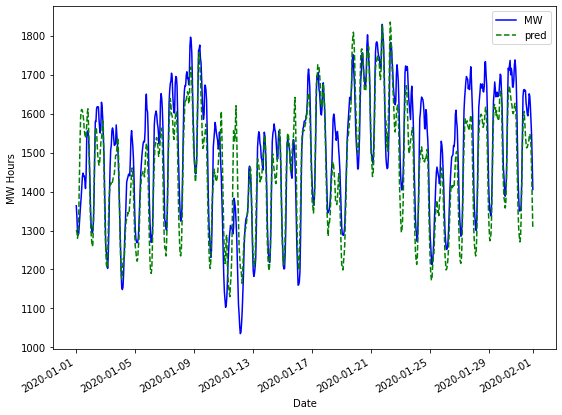

In [39]:
test['MW'].plot(color = 'blue', figsize=(9,7))

plt.ylabel('MW Hours')
plt.xlabel('Date')

test['pred'].plot(color = 'green', linestyle = 'dashed', figsize=(9,7))

plt.legend(loc="best");

plt.show()

In [40]:
test['APE'] = abs((test['MW']-test['pred'])/test['MW'])*100
print("Naive Model MAPE is: ", test['APE'].mean())

Naive Model MAPE is:  4.394719010746262


Great! Remember, the MAPE is probably going to be higher because our model hasn't seen this data before. This is a great way to truly evaluate how well your model will do when deployed in a real world setting since you won't know energy data before you predict it. Looks like our model is only off by 4.4% on average.

The foundation is laid in this step. Model building can be complicated and sometimes it is hard to know when to stop. The best plan is to build a foundational model that you can try to build upon and/or outperform with later editions of your model. Without a good baseline, you won't know how good your final model is. These seasonal effects of hours of day, days of week, months of year as well as the temperature effects build a great first attempt at forecasting future energy usage.

This is a great initial model if your boss needs a check-in to see your progress. This model gets you a long way there since you have incorporated temperature's complicated relationship. In the next milestones you get to build on this great foundation to really show your boss what you can do!